In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directory where the TensorBoard logs are stored
log_dir = os.getcwd()

run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

In [3]:
for f in run_folders:
    if ('default_s1' in f):
        default_s1 = f
    elif('default_s2' in f):
        default_s2 = f
    elif('default_s3' in f):
        default_s3 = f
    elif('default_s4' in f):
        default_s4 = f
    elif('default_s5' in f):
        default_s5 = f
    elif('hyp_search_s1' in f):
        hyp_search_s1 = f
    elif('hyp_search_s2' in f):
        hyp_search_s2 = f
    elif('hyp_search_s3' in f):
        hyp_search_s3 = f
    elif('hyp_search_s4' in f):
        hyp_search_s4 = f
    elif('hyp_search_s5' in f):
        hyp_search_s5 = f

## 6. Hyperparameters and Sample Efficiency
### Experimeent 4. Inverted Pendulum


- curve for diffferent seeds with the same inital parameter

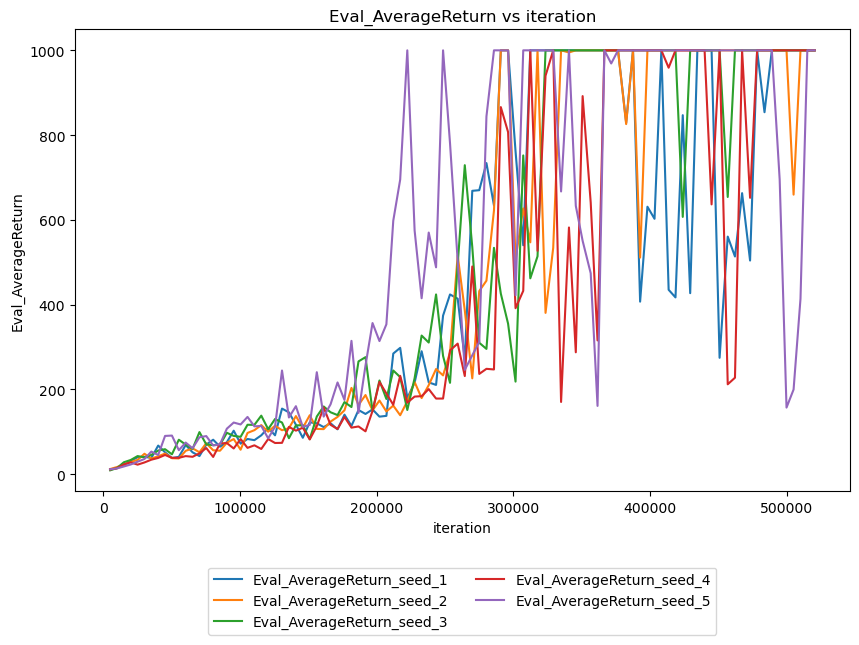

In [6]:
plt.figure(figsize=(10, 6))
event_acc1 = EventAccumulator(default_s1)
event_acc2 = EventAccumulator(default_s2)
event_acc3 = EventAccumulator(default_s3)
event_acc4 = EventAccumulator(default_s4)
event_acc5 = EventAccumulator(default_s5)
event_acc1.Reload()
event_acc2.Reload()
event_acc3.Reload()
event_acc4.Reload()
event_acc5.Reload()
    # Extracting values to plot

steps = np.array([int(s.value) for s in event_acc1.Scalars('Train_EnvstepsSoFar')])
return1 = np.array([s.value for s in event_acc1.Scalars('Eval_AverageReturn')])
return2 = np.array([s.value for s in event_acc2.Scalars('Eval_AverageReturn')])
return3 = np.array([s.value for s in event_acc3.Scalars('Eval_AverageReturn')])
return4 = np.array([s.value for s in event_acc4.Scalars('Eval_AverageReturn')])
return5 = np.array([s.value for s in event_acc5.Scalars('Eval_AverageReturn')])
plt.plot(steps, return1, label='Eval_AverageReturn_seed_1')
plt.plot(steps, return2, label='Eval_AverageReturn_seed_2')
plt.plot(steps, return3, label='Eval_AverageReturn_seed_3')
plt.plot(steps, return4, label='Eval_AverageReturn_seed_4')
plt.plot(steps, return5, label='Eval_AverageReturn_seed_5')


# Adding legends, labels and title
#plt.axhline(y=180,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()

- curve for a better set of hyperparameters

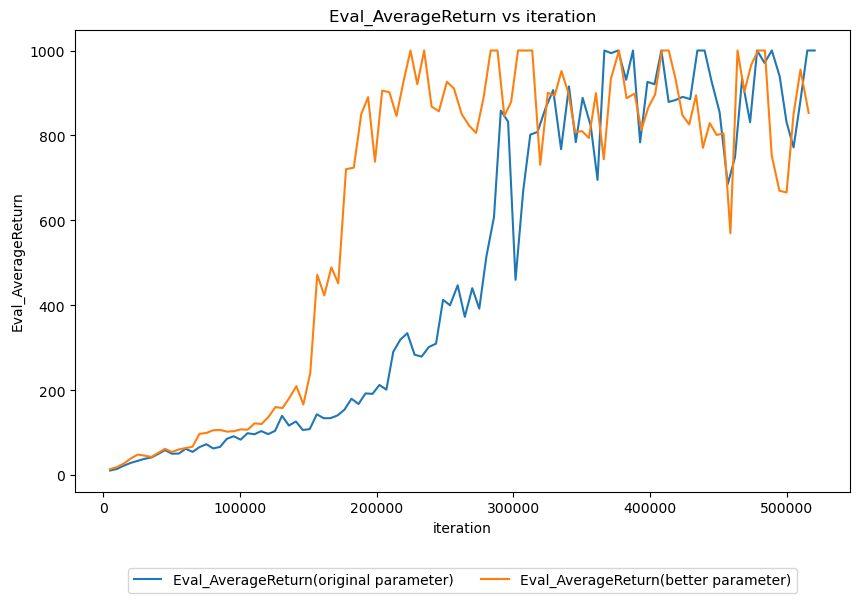

In [7]:
plt.figure(figsize=(10, 6))

average_return = (return1 + return2 + return3 + return4 + return5)/5
event_hyp_search1 = EventAccumulator(hyp_search_s1)
event_hyp_search2 = EventAccumulator(hyp_search_s2)
event_hyp_search3 = EventAccumulator(hyp_search_s3)
event_hyp_search4 = EventAccumulator(hyp_search_s4)
event_hyp_search5 = EventAccumulator(hyp_search_s5)
event_hyp_search1.Reload()
event_hyp_search2.Reload()
event_hyp_search3.Reload()
event_hyp_search4.Reload()
event_hyp_search5.Reload()
    # Extracting values to plot

hyp_steps = np.array([int(s.value) for s in event_hyp_search1.Scalars('Train_EnvstepsSoFar')])
hyp_return1 = np.array([s.value for s in event_hyp_search1.Scalars('Eval_AverageReturn')])
hyp_return2 = np.array([s.value for s in event_hyp_search2.Scalars('Eval_AverageReturn')])
hyp_return3 = np.array([s.value for s in event_hyp_search3.Scalars('Eval_AverageReturn')])
hyp_return4 = np.array([s.value for s in event_hyp_search4.Scalars('Eval_AverageReturn')])
hyp_return5 = np.array([s.value for s in event_hyp_search5.Scalars('Eval_AverageReturn')])
average_hyp_return = (hyp_return1 + hyp_return2 + hyp_return3 + hyp_return4 + hyp_return5)/5
plt.plot(steps, average_return, label='Eval_AverageReturn(original parameter)')
plt.plot(hyp_steps, average_hyp_return, label='Eval_AverageReturn(better parameter)')

# Adding legends, labels and title
#plt.axhline(y=180,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()

for seed in $(seq 1 5); do
    python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
    --exp_name pendulum_discount_hyp_search_s$seed \
    -rtg --use_baseline -na \
    --discount 0.99 \
    --gae_lambda 0.99 \
    -s 256 \
    -l 3 \
    -lr 0.001 \
    -blr 0.002 \
    --batch_size 5000 \
    --baseline_gradient_steps 20 \
    --seed $seed
done